# 认识softmax函数 

在机器学习中，我们会使用二分类算法的Many-vs-Many (多对多) 和One-vs-Rest (一对多)模式来进行多分类。其中，OvR是指将多个标签类别中的一类作为类别1，其他所有类别作为类别0，分别建立多个二分类模型，综合得出多分类结果的方法。MvM是指把好几个标签类作为1，剩下的几个标签类别作为0，同样分别建立多个二分类模型来得出多分类结果的方法。这两种方法非常有效，尤其是在逻辑回归做多分类的问题上能够解决很多问题但是在深度学习世界却完全不奏效。理由非常简单:

1. 逻辑回归是一个单层神经网络，计算非常快速，在使用OVR和MvM这样需要同时建立多个模型的方法时，运算速度不会成为太大的问题。但真实使用的神经网络往往是一个庞大的算法，建立一个模型就会耗费很多时间，因此必须建立很多个模型来求解的方法对神经网络来说就不够高效。<br>
2. 我们有更好的方法来解决这个问题，那就是softmax回归

Softmax函数是深度学习基础中的基础，它是神经网络进行多分类时，默认放在输出层中处理数据的函数。假设现在神经网络是用于三分类数据，且三个分类分别是苹果，柠檬和百香果，序号则分别是分类1、分类2和分类3。则使用softmax函数的神经网络的模型会如下所示：

那每个概率是如何计算出来的呢? 来看Softmax函数的公式

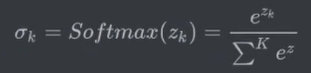

其中e为自然常数(约为2.71828) ，z与sigmoid函数中的2一样，表示回归类算法(如线性回归)的结果。K表示该数据的标签中总共有飞个标签类别，如三分类时K = 3，四分类时K = 4。表示标签类别k类。很容易可以看出，Softmax函数的分子是多分类状况下某一个标签类别的回归结果的指数函数，分母是多分类状况下所有标签类别的回归结果的指数函数之和，<b>因此Softmax函数的结果代表了样本的结果为类别k的概率<b>

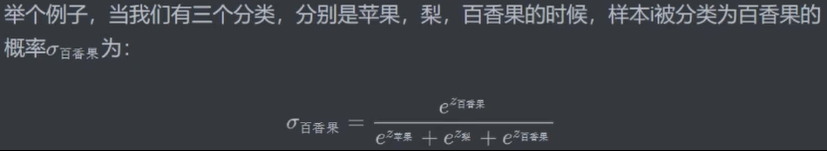

#  PyTorch中的softmax函数

我们曾经提到过，神经网络是模型效果很好，但运算速度非常缓慢的算法。softmax函数也存在相同的问题一它可以将多分类的结果转变为概率 (这是一个极大的优势)，但它需要的计算量非常巨大。由于softmax的分子和分母中都带有e为底的指数函数，所以在计算中非常容易出现极大的数值。

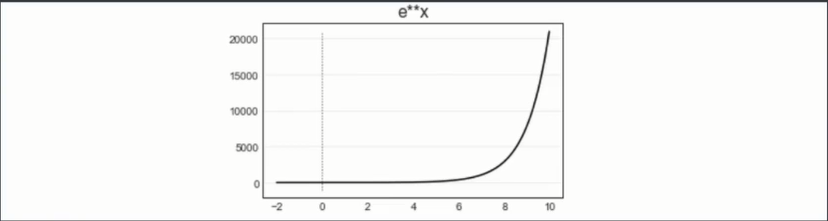

如上图所示，e1就已经等于20000了，而回归结果2完全可能是成千上万的数字。事实上100会变成一个后面有40多个0的超大值，e1000则会直接返回无限大inf，这意味着这些数字已经超出了计算机处理数时要求的有限数据宽度，超大数值无法被计算机运算和表示。这种现象叫做“溢出“，当计算机返回”内存不足”或Python服务器直接断开连接的时候，可能就是发生了这个问题。来看看这个问题实际发生时的状况:

In [1]:
import torch

In [2]:
# 对于单一样本，假定一组巨大的z
z = torch.tensor([1010,1000,990],dtype = torch.float32)

<li>手动实现softmax函数的运算

In [3]:
torch.exp(z)/torch.sum(torch.exp(z))

tensor([nan, nan, nan])

<li>PyTorch内置softmax函数

In [4]:
# ‘0’ 为你希望进行softmax运算的那个维度的索引
torch.softmax(z,0)

tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])

In [5]:
# 对于单一样本，假定一组正常的z
z = torch.tensor([10,9,5],dtype = torch.float32)

In [6]:
torch.exp(z)/torch.sum(torch.exp(z))

tensor([0.7275, 0.2676, 0.0049])

In [7]:
torch.softmax(z,0)

tensor([0.7275, 0.2676, 0.0049])

In [8]:
torch.softmax(z,0).sum()

tensor(1.)

<li> softmax维度

In [11]:
s = torch.tensor([[[1,2,3,4],[2,3,4,5],[3,4,5,6]],[[4,5,6,7],[5,6,7,8],[6,7,8,9]]],dtype = torch.float32)
s

tensor([[[1., 2., 3., 4.],
         [2., 3., 4., 5.],
         [3., 4., 5., 6.]],

        [[4., 5., 6., 7.],
         [5., 6., 7., 8.],
         [6., 7., 8., 9.]]])

In [12]:
s.shape

torch.Size([2, 3, 4])

In [13]:
s.shape[0]

2

In [16]:
torch.softmax(s,0)

tensor([[[0.0474, 0.0474, 0.0474, 0.0474],
         [0.0474, 0.0474, 0.0474, 0.0474],
         [0.0474, 0.0474, 0.0474, 0.0474]],

        [[0.9526, 0.9526, 0.9526, 0.9526],
         [0.9526, 0.9526, 0.9526, 0.9526],
         [0.9526, 0.9526, 0.9526, 0.9526]]])

In [14]:
s.shape[1]

3

In [17]:
torch.softmax(s,1)

tensor([[[0.0900, 0.0900, 0.0900, 0.0900],
         [0.2447, 0.2447, 0.2447, 0.2447],
         [0.6652, 0.6652, 0.6652, 0.6652]],

        [[0.0900, 0.0900, 0.0900, 0.0900],
         [0.2447, 0.2447, 0.2447, 0.2447],
         [0.6652, 0.6652, 0.6652, 0.6652]]])

In [15]:
s.shape[2]

4

In [18]:
torch.softmax(s,2)

tensor([[[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]],

        [[0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439],
         [0.0321, 0.0871, 0.2369, 0.6439]]])

<li>torch.functional实现softmax的正向传播

In [19]:
import torch
from torch.nn import functional as F

In [24]:
X = torch.randn(5, 10)
X

tensor([[-0.2484, -0.7195,  0.1981, -0.5415, -0.1756, -0.9603, -0.3463,  0.6305,
         -0.3267, -0.2392],
        [ 0.9685,  1.5425,  0.9064,  0.6141, -2.0313,  0.2198,  0.8619, -1.3881,
         -0.9976,  1.4449],
        [-0.4103,  0.6988, -0.2593,  0.5294, -0.0150, -0.6792,  1.4394, -0.1133,
         -0.5677,  1.0023],
        [-0.1573,  0.0502,  1.1628, -1.5803,  1.1844,  0.5667, -0.4177, -0.1583,
         -0.6605,  0.5581],
        [ 1.7164, -0.9689,  0.6828,  1.7300, -1.2579,  0.5402,  0.8250,  0.8396,
         -0.2110, -1.1931]])

In [26]:
# 设置随机数种子 仅在一个cell中生效
torch.random.manual_seed(10)
# 实例化torch.nn.Linear
# 输入特征维度为10 和 输出类别数为3
dense = torch.nn.Linear(10,3)
zhat = dense(X)
soft = F.softmax(zhat,1)
soft

tensor([[0.3179, 0.2047, 0.4774],
        [0.2539, 0.2701, 0.4760],
        [0.4194, 0.2350, 0.3457],
        [0.1638, 0.5104, 0.3257],
        [0.5501, 0.3225, 0.1274]], grad_fn=<SoftmaxBackward0>)